# IS_733 Week6_Lab

Task1(b) is to build a logistic regression model first using student_data.csv

In [1]:
#load the dataset
import pandas as pd

file_path = "C:/Users/harsha/Desktop/DataMining_733/Week6_Lab/student_data.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

In [2]:
df.head()

,Hours_Studied,Review_Session,Results
0,3.745401,0,0
1,9.507143,1,1
2,7.319939,0,1
3,5.986585,0,1
4,1.560186,1,1


In [5]:
#knowing the shape of dataset
df.shape

(100, 3)

In [6]:
#knowing the information of the available dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Hours_Studied   100 non-null    float64
 1   Review_Session  100 non-null    int64  
 2   Results         100 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 2.5 KB


In [8]:
df.tail()

,Hours_Studied,Review_Session,Results
95,4.937956,1,1
96,5.227328,1,1
97,4.275410,0,1
98,0.254191,0,0
99,1.078914,1,0


In [9]:
df.describe()

,Hours_Studied,Review_Session,Results
count,100.000000,100.000000,100.000000
mean,4.701807,0.490000,0.680000
std,2.974894,0.502418,0.468826
min,0.055221,0.000000,0.000000
25%,1.932008,0.000000,0.000000
50%,4.641425,0.000000,1.000000
75%,7.302031,1.000000,1.000000
max,9.868869,1.000000,1.000000


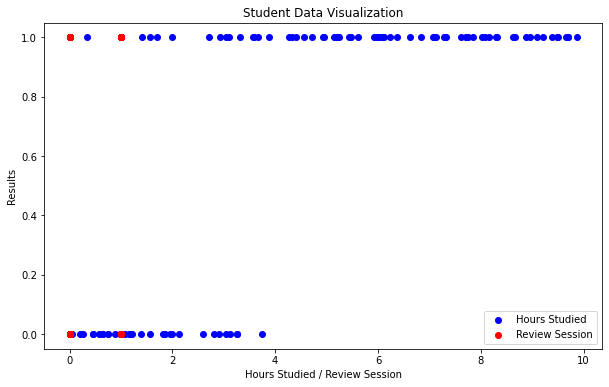

In [10]:
#1. Visualization of the data
import matplotlib.pyplot as plt

# Create a scatter plot to visualize the data
plt.figure(figsize=(10, 6))

# Scatter plot for Hours Studied vs. Results
plt.scatter(df['Hours_Studied'], df['Results'], c='blue', label='Hours Studied')

# Scatter plot for Review Session vs. Results
plt.scatter(df['Review_Session'], df['Results'], c='red', label='Review Session')

plt.xlabel('Hours Studied / Review Session')
plt.ylabel('Results')
plt.legend(loc='best')
plt.title('Student Data Visualization')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#(ii). Creating a logistic regression model 
# Define the features (X) and the target variable (y)
X = df[['Hours_Studied', 'Review_Session']]
y = df['Results']

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the entire dataset
model.fit(X, y)

# Make predictions on the same dataset
y_pred = model.predict(X)

# Calculate the accuracy of the model on the training data
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy of the data: {accuracy:.2f}")

Accuracy on the training data: 0.93


Accuracy: 0.93
AUC: 0.98


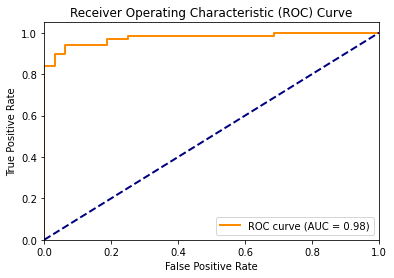

Model Coefficients: [[1.36499215 1.87733756]]
Intercept: [-4.61182462]


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt


# Calculate accuracy
accuracy = accuracy_score(y, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate probabilities for ROC curve
y_prob = model.predict_proba(X)[:, 1]

# Calculate AUC (Area Under the ROC Curve)
auc_score = roc_auc_score(y, y_prob)
print(f"AUC: {auc_score:.2f}")

# Calculate and plot ROC curve
fpr, tpr, _ = roc_curve(y, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Output model coefficients
coefficients = model.coef_
intercept = model.intercept_
print(f"Model Coefficients: {coefficients}")
print(f"Intercept: {intercept}")

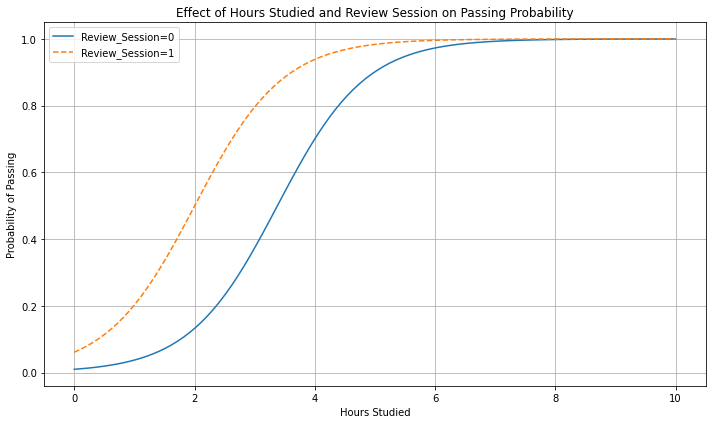

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc


# Define the logistic function
def logistic_function(z):
    return 1 / (1 + np.exp(-z))

# Define the model
def log_odds(hours_studied, review_session):
    return intercept + coefficients[0][0] * hours_studied + coefficients[0][1] * review_session

# Generate some data
hours_studied = np.linspace(0, 10, 100)

# Calculate log-odds and probabilities for both Review_Session=0 and Review_Session=1
log_odds_0 = log_odds(hours_studied, 0)
probability_0 = logistic_function(log_odds_0)

log_odds_1 = log_odds(hours_studied, 1)
probability_1 = logistic_function(log_odds_1)

# Plot the data
plt.figure(figsize=(10,6))

plt.plot(hours_studied, probability_0, label='Review_Session=0')
plt.plot(hours_studied, probability_1, label='Review_Session=1', linestyle='--')

plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.title('Effect of Hours Studied and Review Session on Passing Probability')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


#Task-2
Understanding and Prevent Overfitting in the context of SVM 

In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score


# Create an SVM model with a linear kernel
svm_model_linear = SVC(kernel='linear')
svm_model_linear.fit(X, y)

# Make predictions using the linear kernel SVM
y_pred_linear = svm_model_linear.predict(X)

# Calculate accuracy using the linear kernel SVM
accuracy_linear = accuracy_score(y, y_pred_linear)
print(f"Accuracy (Linear Kernel): {accuracy_linear:.2f}")

# Create an SVM model with an RBF kernel
svm_model_rbf = SVC(kernel='rbf')

# Define a grid of hyperparameters to search (gamma values)
param_grid = {'gamma': [0.001, 0.01, 0.1, 1, 10]}

# Create a StratifiedKFold cross-validation object
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform grid search with cross-validation to find the best gamma parameter
grid_search = GridSearchCV(svm_model_rbf, param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X, y)

# Get the best gamma value
best_gamma = grid_search.best_params_['gamma']

# Fit the SVM model with the best gamma parameter
svm_model_rbf_best = SVC(kernel='rbf', gamma=best_gamma)
svm_model_rbf_best.fit(X, y)

# Make predictions using the best RBF kernel SVM
y_pred_rbf_best = svm_model_rbf_best.predict(X)

# Calculate accuracy using the best RBF kernel SVM
accuracy_rbf_best = accuracy_score(y, y_pred_rbf_best)
print(f"Best Gamma Parameter: {best_gamma}")
print(f"Accuracy (Best RBF Kernel): {accuracy_rbf_best:.2f}")

Accuracy (Linear Kernel): 0.92
Best Gamma Parameter: 1
Accuracy (Best RBF Kernel): 0.95


Accuracy (Linear Kernel, C=0.1): 1.00
Accuracy (Linear Kernel, C=1): 1.00
Accuracy (Linear Kernel, C=10): 1.00
Accuracy (Linear Kernel, C=1000): 1.00


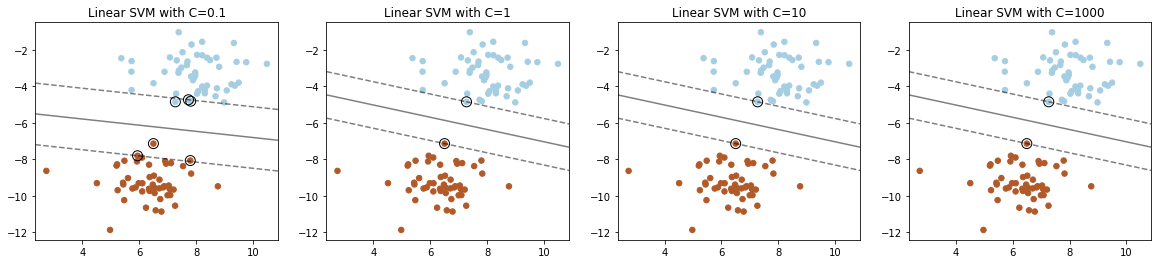

Accuracy (RBF Kernel, gamma=0.1): 0.86
Accuracy (RBF Kernel, gamma=1): 0.98
Accuracy (RBF Kernel, gamma=10): 1.00
Accuracy (RBF Kernel, gamma=100): 1.00
Best Gamma Parameter: 1
Accuracy (Best RBF Kernel): 0.98


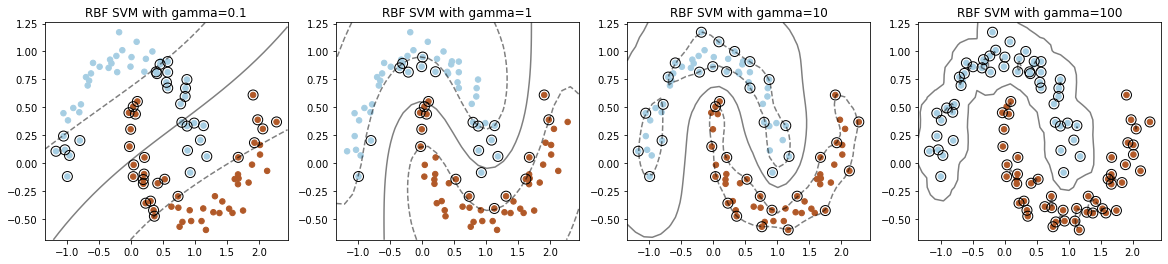

In [33]:

from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score

# Create a simple dataset
X_blobs, y_blobs = make_blobs(n_samples=100, centers=2, random_state=6)

# Train SVMs with different C values (Linear Kernel)
C_values = [0.1, 1, 10, 1000]
models_linear = [SVC(kernel='linear', C=C).fit(X_blobs, y_blobs) for C in C_values]

# Plot the decision boundaries for linear kernel SVMs

fig, axes = plt.subplots(1, len(C_values), figsize=(20, 4))

for model, ax, C in zip(models_linear, axes, C_values):
    ax.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs, s=30, cmap=plt.cm.Paired)
    ax = plot_decision_function(model, ax)
    ax.set_title(f'Linear SVM with C={C}')
    
    # Calculate accuracy using the linear kernel SVM
    y_pred_linear = model.predict(X_blobs)
    accuracy_linear = accuracy_score(y_blobs, y_pred_linear)
    print(f'Accuracy (Linear Kernel, C={C}): {accuracy_linear:.2f}')

plt.show()

# Generate moon-shaped data
X_moons, y_moons = make_moons(n_samples=100, noise=0.1, random_state=42)

# Generate donut-shaped data
X_circles, y_circles = make_circles(n_samples=100, factor=0.3, noise=0.1, random_state=42)

# Train SVMs with different gamma values for RBF kernel
gamma_values = [0.1, 1, 10, 100]
param_grid_rbf = {'gamma': gamma_values}
cv_rbf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search_rbf = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid_rbf, cv=cv_rbf, scoring='accuracy')
grid_search_rbf.fit(X_moons, y_moons)
best_gamma_rbf = grid_search_rbf.best_params_['gamma']

models_rbf = [SVC(kernel='rbf', gamma=gamma).fit(X_moons, y_moons) for gamma in gamma_values]

# Plot the decision boundaries for RBF kernel SVMs
fig, axes = plt.subplots(1, len(gamma_values), figsize=(20, 4))


for model, ax, gamma in zip(models_rbf, axes, gamma_values):
    ax.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, s=30, cmap=plt.cm.Paired)
    ax = plot_decision_function(model, ax)
    ax.set_title(f'RBF SVM with gamma={gamma}')
    
    # Calculate accuracy using the RBF kernel SVM
    y_pred_rbf = model.predict(X_moons)
    accuracy_rbf = accuracy_score(y_moons, y_pred_rbf)
    print(f'Accuracy (RBF Kernel, gamma={gamma}): {accuracy_rbf:.2f}')

# Print the best gamma parameter and accuracy of the best RBF kernel SVM
print(f"Best Gamma Parameter: {best_gamma}")
best_model_rbf = models_rbf[gamma_values.index(best_gamma)]
y_pred_rbf_best = best_model_rbf.predict(X_moons)
accuracy_rbf_best = accuracy_score(y_moons, y_pred_rbf_best)
print(f"Accuracy (Best RBF Kernel): {accuracy_rbf_best:.2f}")

plt.show()
